# Couple model

### Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=1,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import transitions

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
single_kwargs = {'Na':20}
data = RetirementClass(couple=True, single_kwargs=single_kwargs, Na=20)

In [5]:
data.solve()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


In [11]:
data.simulate()

TypeError: simulate_single() missing 1 required positional argument: 'ret'

### Solve model

In [2]:
Couple = RetirementClass(couple=True)
Couple.solve()

### Plot for women and men

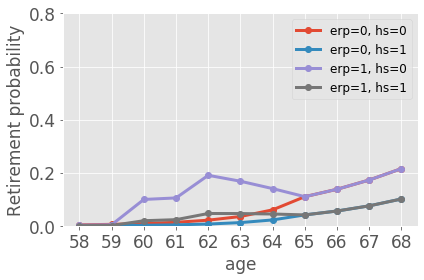

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.choice_probs_c(data,ax,ma=0,ylim=[0,0.8])
fig.tight_layout()
#fig.savefig('figs/Model/Couple_ChoiceProb_Women.png')

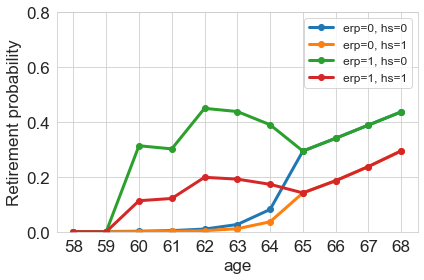

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.choice_probs_c(Couple,ax,ma=1,ylim=[0,0.8])
fig.tight_layout()
fig.savefig('figs/Model/Couple_ChoiceProb_Men.png')

# Consumption and value functions

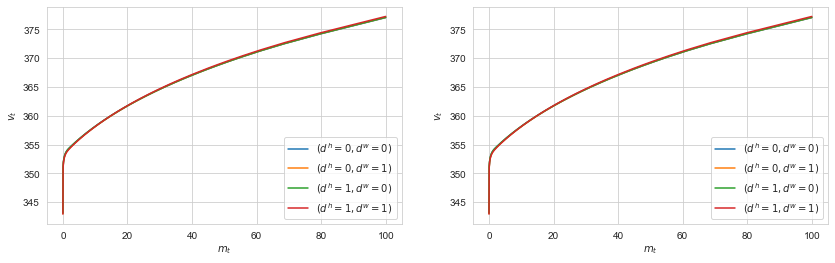

In [38]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy_c(test,axs[0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
figs.policy_c(test,axs[1],var='v',T=[15],AD=[0],ST_h=[1],ST_w=[1],RA_h=[2],RA_w=[2],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
plt.show()

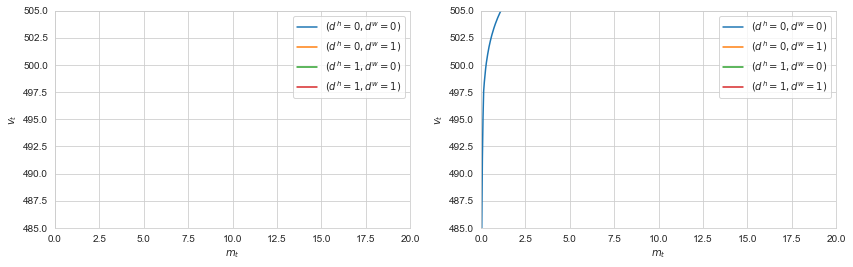

In [39]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy_c(test,axs[0],var='v',T=[4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],xlim=[0,20],ylim=[485,505],bottom=1)
figs.policy_c(test,axs[1],var='v',T=[4],AD=[0],ST_h=[1],ST_w=[1],RA_h=[2],RA_w=[2],D_h=[0,1],D_w=[0,1],label=['d'],xlim=[0,20],ylim=[485,505],bottom=1)
plt.show()

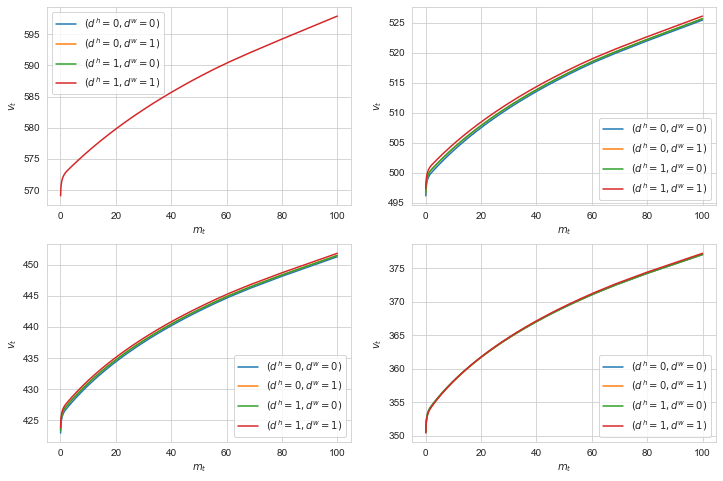

In [40]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
plt.show()

### We consider a household with zero age difference, where both are low skilled and no erp

### d_h=d_w=0

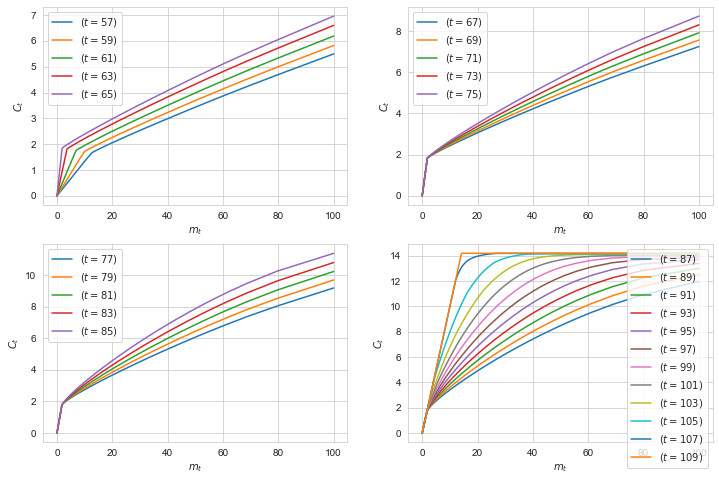

In [41]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

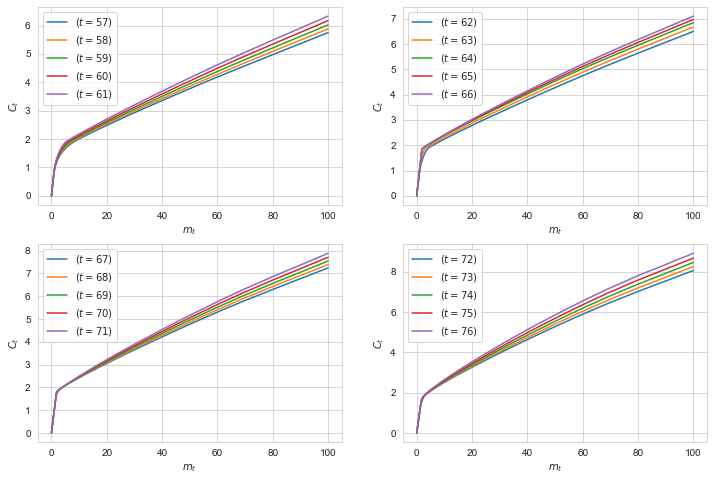

In [42]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = 1 and d_w = 0

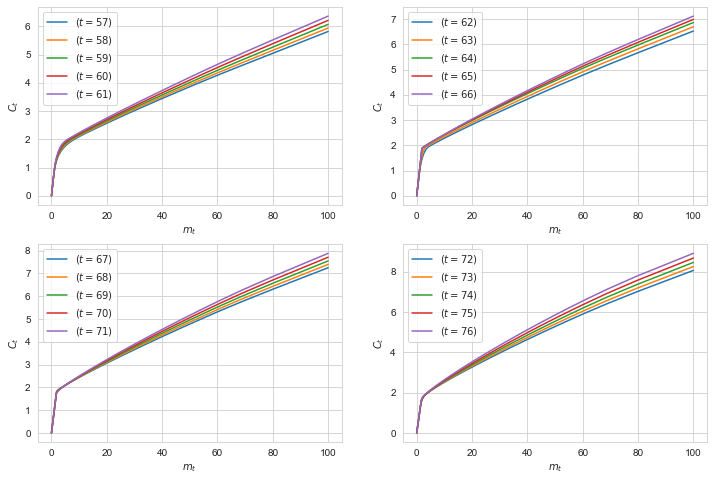

In [43]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
plt.show()

### d_h = d_w = 1

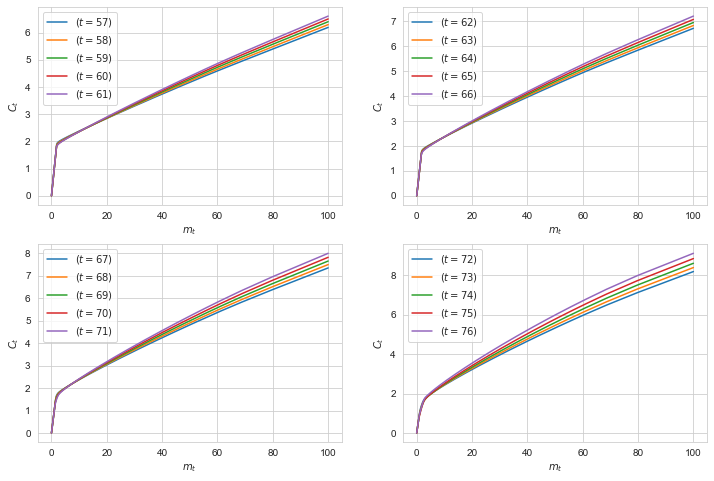

In [27]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
plt.show()

### Now we consider a household with erp and high skilled

### d_h=d_w=0

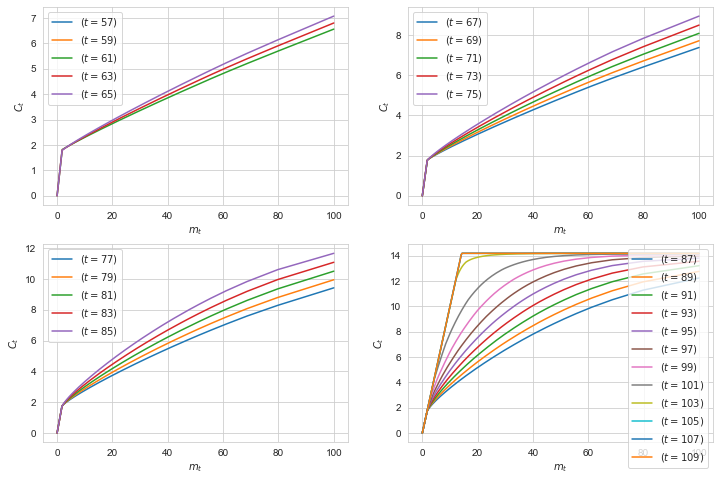

In [30]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

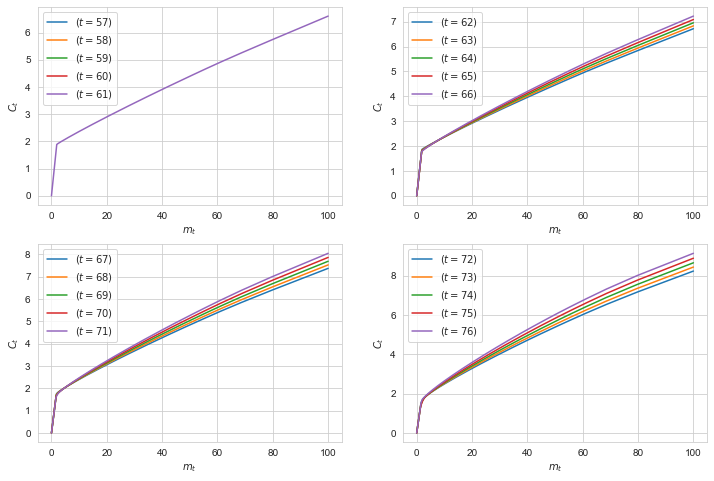

In [31]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = d_w = 1

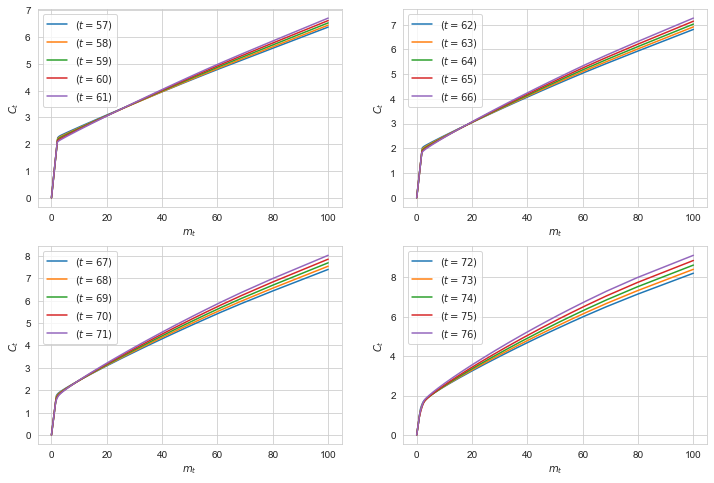

In [33]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
plt.show()

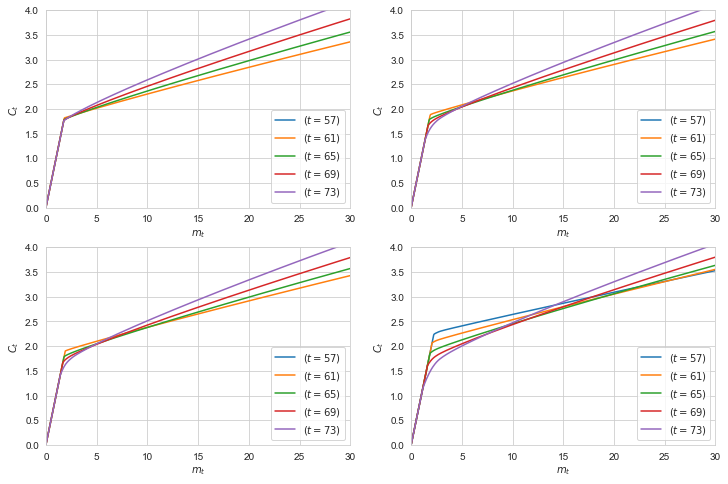

In [34]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[0,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
plt.show()

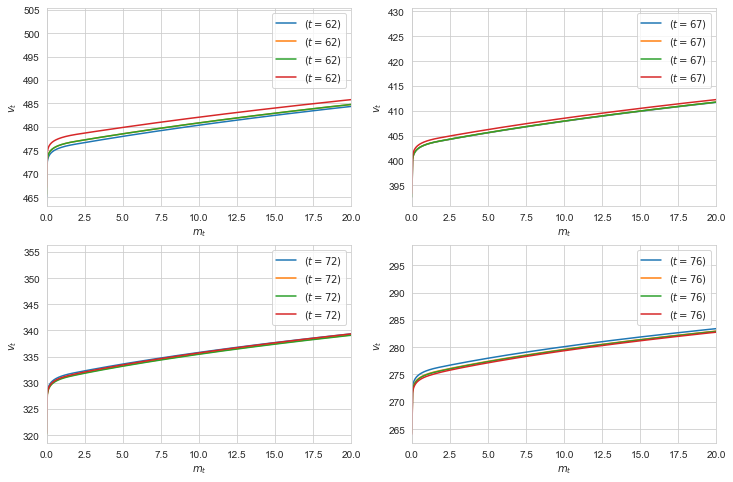

In [35]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.policy_c(test,axs[0,0],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[0,1],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,1],var='v',T=[19],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
plt.show()

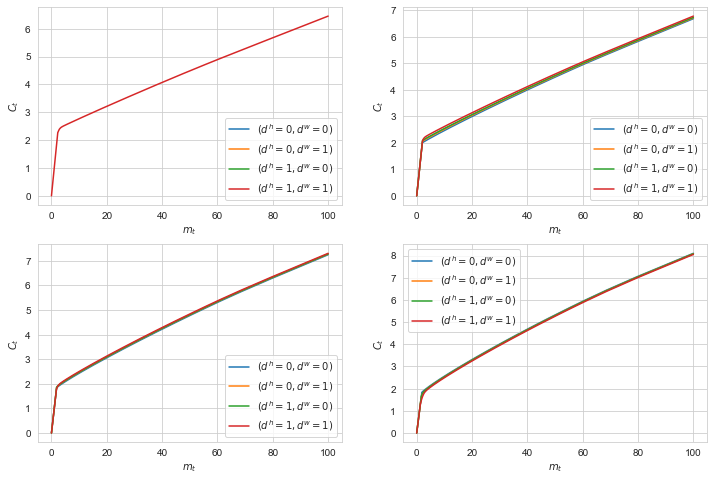

In [18]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='c',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='c',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='c',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

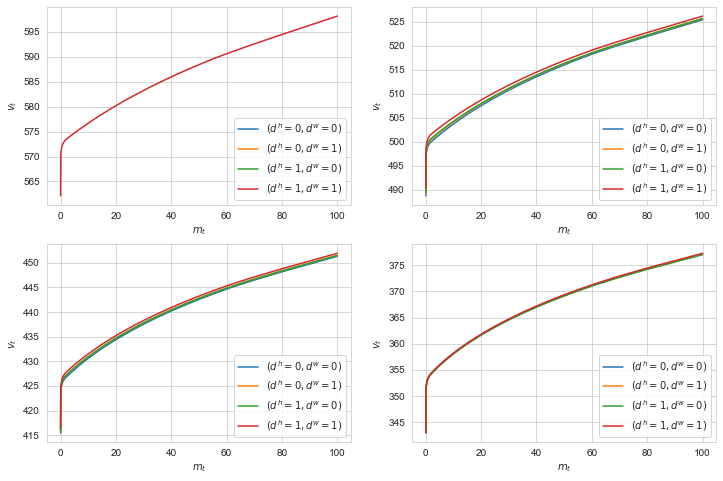

In [19]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

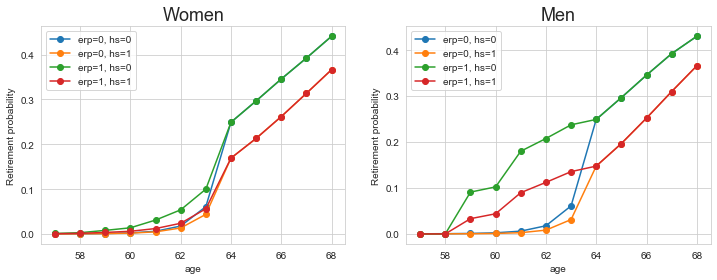

In [21]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs_c(test,axs[0],ma=0,ST=[0,1,2,3])
figs.choice_probs_c(test,axs[1],ma=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

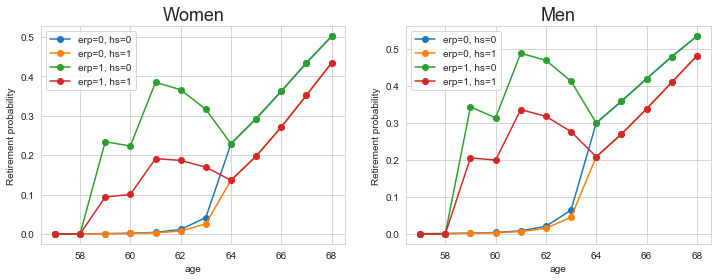

In [18]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs(test.Single,axs[0],AD=0,MA=0,ST=[0,1,2,3])
figs.choice_probs(test.Single,axs[1],AD=0,MA=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()